# Part I - FordGoBike Trip Feb., 2019 Exploratory Analysis
## by Aishat Adeyemo


This document explores a dataset containing shared trips and attributes for approximately 183,500 trips taken in the month of February, year 2019 via FordGoBike hailing services.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load the dataset and print basic overview info
trip = pd.read_csv('201902-fordgobike-tripdata.csv')
print(trip.shape) 
print(trip.info())
trip.head() 

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#create a list of columns with null values
null_columns = ['member_birth_year', 'member_gender']

#loop through the list
for i in null_columns:
    
    #fill nulls with most occurring values
    trip[i].fillna(trip[i].mode()[0], inplace = True)

In [4]:
#remove rows with null values
trip.dropna(inplace = True)

In [5]:
#change datatypes to appropriate ones
convert_dtype = {'start_time' : 'datetime64'
                 , 'end_time' : 'datetime64'
                 , 'start_station_id' : str
                 , 'start_station_latitude' : str
                 , 'start_station_longitude' : str
                 , 'end_station_id' : str
                 , 'end_station_latitude' : str
                 , 'end_station_longitude' : str
                 , 'bike_id' : str
                 , 'member_birth_year' : int
                }
trip = trip.astype(convert_dtype)

There are some features such as 'day' and 'ride hour' that I would love to explore but aren't directly available in the dataset. Also, the trip duration is better represented in minutes, while 'Age' will be easier to work with than 'birth year'. So, I'll do some feature engineering to extract these.

In [6]:
#convert duration_sec to duration_min
trip['duration_min'] = (trip['duration_sec'] / 60).astype(int) 

In [7]:
#create a new age column and as int datatype
trip['age'] = (pd.datetime.now().year - trip['member_birth_year']).astype(int)

In [8]:
#extract the ride hour from start tim
hour = trip['start_time'].dt.hour

#categorize the hours into periods
trip['ride_period'] = pd.cut(hour, bins = [-1, 6, 11, 13, 16, 19, 23],
                        labels = ['Midnight', 'Morning', 'Mid-day', 'Afternoon', 'Evening', 'Night'])

In [9]:
#extract the weekday from start time
trip['day'] = trip['start_time'].dt.day_name()

In [10]:
#confirm the variables are now present in the dataset
trip.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183215 non-null object
start_station_longitude    183215 non-null object
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183215 non-null object
end_station_longitude      183215 non-null object
bike_id                    183215 non-null object
user_type                  183215 non-null object
member_birth_year          183215 non-null int64
member_gender              183215 non-null object
bike_share_for_all_trip    183215 non-null object
duration_min               183215 non-null int64
age                       

In [11]:
trip.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,ride_period,day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.7896254,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869,38,Evening,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.77588,-122.39317,2535,Customer,1988,Male,No,708,34,Evening,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.7693053,-122.4268256,3.0,Powell St BART Station (Market St at 4th St),37.7863752686,-122.404904366,5905,Customer,1972,Male,No,1030,50,Mid-day,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.7748362941,-122.44654566,70.0,Central Ave at Fell St,37.7733108789,-122.444292605,6638,Subscriber,1989,Other,No,608,33,Evening,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.8045623549,-122.271738052,222.0,10th Ave at E 15th St,37.7927143,-122.2487796,4898,Subscriber,1974,Male,Yes,26,48,Night,Thursday


### What is the structure of your dataset?

There are 183,215 rows of trip information and 20 variables in dataset. Most of the variables nominal and not entirely ordered. duration_min (replacing duration_sec) and age (replacing birth year) are the only numerical variables in the dataset.

### What is/are the main feature(s) of interest in your dataset?

Features of interest are those that would predict if a user would share a bike trip or not in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that the trip's duration, ride period, and gender will strongly determine the share status. Also, I think that age and user type will have an effect on the share status although, not as strong as the aforementioned features. 

## Univariate Exploration

I'll start by checking the disitribution of duration values. 

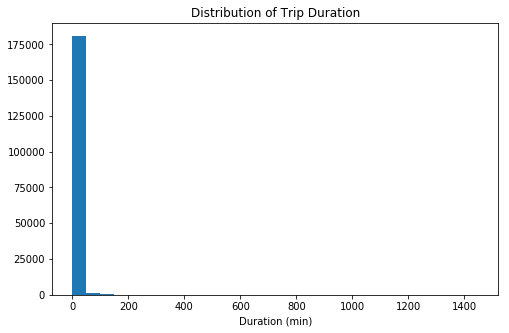

In [12]:
#plot a standard-scale histogram
bins = np.arange(0, trip['duration_min'].max()+50, 50)

plt.figure(figsize=[8, 5])
plt.hist(data = trip, x = 'duration_min', bins = bins)
plt.xlabel('Duration (min)')
plt.title('Distribution of Trip Duration');

There's a long tail in the distribution and most of the values fall into just 2 bins on the far left even though the values in the duration column span up to 1400. I'll set a limit on the x-axis and reduce the binsize to get a zoomed-in plot.

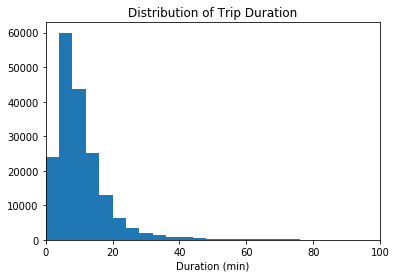

In [13]:
#reduce bin size
bins = np.arange(0, trip['duration_min'].max()+4, 4)
plt.hist(data = trip, x = 'duration_min', bins = bins)
plt.xlabel('Duration (min)')

#set limit on x-axis
plt.xlim([0, 100])
plt.title('Distribution of Trip Duration');

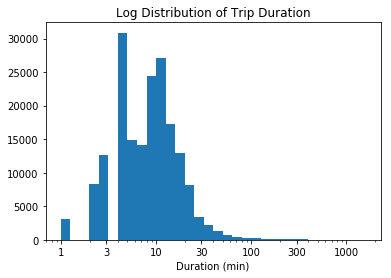

In [14]:
#plot a log-scale distribution
bins = 10 ** np.arange(0, np.log10(trip['duration_min'].max())+0.1, 0.1)

plt.hist(data = trip, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000], [1, 3, 10, 30, 100, 300, 1000])
plt.xlabel('Duration (min)')
plt.title('Log Distribution of Trip Duration');

Duration (min) has a long-tailed distribution when plotted on a standard scale. When plotted on a log-scale, the values are slightly normally distributed and bimodal with the first peak around 4-5 mins and the second peak around 10-20 mins.

Next is to look at the distribution of ages.

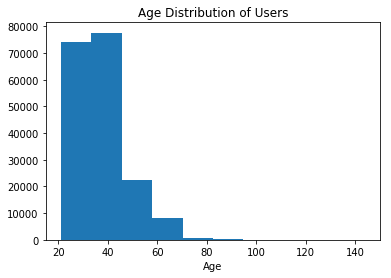

In [15]:
#plot a histogram for age distribution
plt.hist(data = trip, x = 'age')
plt.xlabel('Age')
plt.title('Age Distribution of Users');

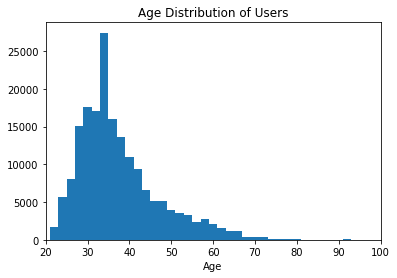

In [16]:
#set a limit on x-axis and reduce the bin size
bins = np.arange(trip['age'].min(), trip['age'].max()+2, 2)

plt.hist(data = trip, x = 'age', bins = bins)
plt.xlim([20,100])
plt.xlabel('Age')
plt.title('Age Distribution of Users');

In [17]:
trip['age'].max()

144

The histogram plot for age distribution shows that the ages of users ranges from 20 to 140. However, there are very few, negligble values at the high end on the x-axis. So, I reduced the bin size and set a limit on the x-axis in order to get a closer visual. According to the visualization, most of the users are of age 35-36 years.

I'll plot a bar graph of the share status of all trips in the dataset.

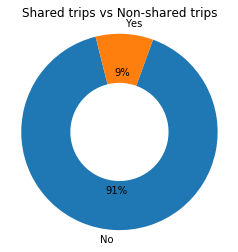

In [18]:
#get the count for each unique values in the column
values = trip.bike_share_for_all_trip.value_counts()

#plot a bar graph of trip share status
plt.pie(values, labels = values.index, startangle = 70,
        counterclock = False, autopct='%1.0f%%', wedgeprops = {'width' : 0.5})
plt.axis('square')
plt.title('Shared trips vs Non-shared trips');

According to the plot, only 9% of the trips were shared. 

I'll move on to plot bar graphs of other seleted categorical variables. First, I'll order the categories of each feature. Then, plot bar graphs of each variables.


In [19]:
#create an ordered categorical type for day, user_type, member_gender and ride_period
var_order = {'day' : ['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                       'Thursday', 'Friday', 'Saturday'],
             'member_gender' : ['Male', 'Female', 'Other'],
             'user_type' : ['Subscriber', 'Customer'],
             'ride_period' : ['Midnight', 'Morning', 'Mid-day', 'Afternoon', 'Evening', 'Night']}

for var in var_order:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var_order[var])
    trip[var] = trip[var].astype(ordered_var) 

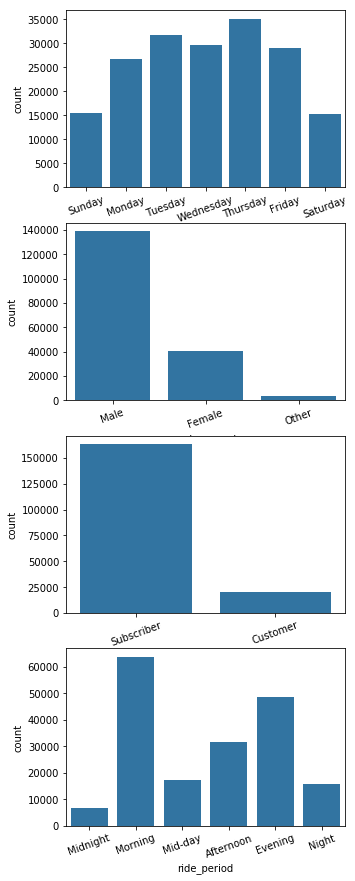

In [20]:
#set figure, axes and color
fig, ax = plt.subplots(nrows = 4, figsize = [5, 15])
color = sb.color_palette()[0]

# re-assign the dictionary from previous cell to a new variable
variables = var_order

#plot each graph using a for loop
for i in range(len(variables.keys())):
    var = list(variables.keys())[i]
    sb.countplot(data = trip, x = var, color = color, ax = ax[i])
    ax[i].set_xticklabels(labels = variables[var], rotation = 20);
    

Number of rides increased steadily from Sunday up till Tuesday, then dropped on Wednesday and increased on Thursday again after which it decreased down till Saturday. Thursday has the highest number of rides.
Subscribers of the bike-share service took more trips, which is a quite significant difference, than the non-subscribers. This is absolutely expected.
The male users are the highest users of the service, followed by the female user and then users of other gender other than the aforementioned.
Checking the period of the day which the rides are taken, majority of the rides were taken in the morning while the least numberb of rides were taken in the midnight. There's a very sharp increase in the number of rides from midnight to morning followed by a sharp decrease in the number of rides from morning to mid-day, a steep increase from mid-day to evening and then, a decrease by Night.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The ride share status is a categorial data and has just 2 distinct values (yes/no). Most of the rides taken were not shared. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Of all the features investigated so far, only the trip duration in minutes had to undergo a minor change. It had values which ranged from 0 to 1400 minutes and a long tail depicting most of the values in the 0-80 minutes range. I changed the the plot scale to a LOG scale and reduced the bin size. The data distribution showed the peak to be in the 5 minutes region, followed by the 20 mins region. 

## Bivariate Exploration

I'll begin the bivariate exploration by checking the correlation between the numeric features; 'duration_min' and 'age'.

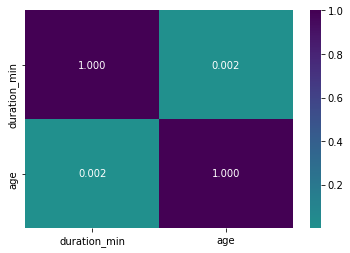

In [21]:
sb.heatmap(trip[['duration_min', 'age']].corr(), annot = True,
           fmt = '.3f', cmap = 'viridis_r', center = 0);

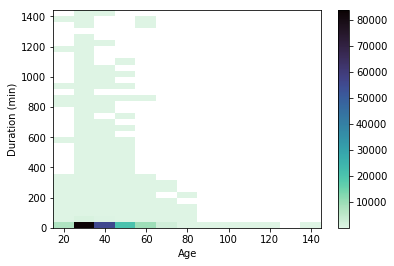

In [22]:
bin_x = np.arange(15, trip['age'].max()+10, 10)
bin_y = np.arange(0, trip['duration_min'].max()+40, 40)
plt.hist2d(data = trip, x = 'age', y = 'duration_min',
           cmin = 0.5, cmap = 'mako_r', bins = [bin_x, bin_y])
plt.xlabel('Age')
plt.ylabel('Duration (min)')
plt.colorbar();

Trip' s Duration and users' age do not have any strong correlation. And from the heatmap, the intensified points indicate most  users being within 20 - 60 years of age and took a trips of under 50 mins. However, very few users are dispersed across values outside those ranges.

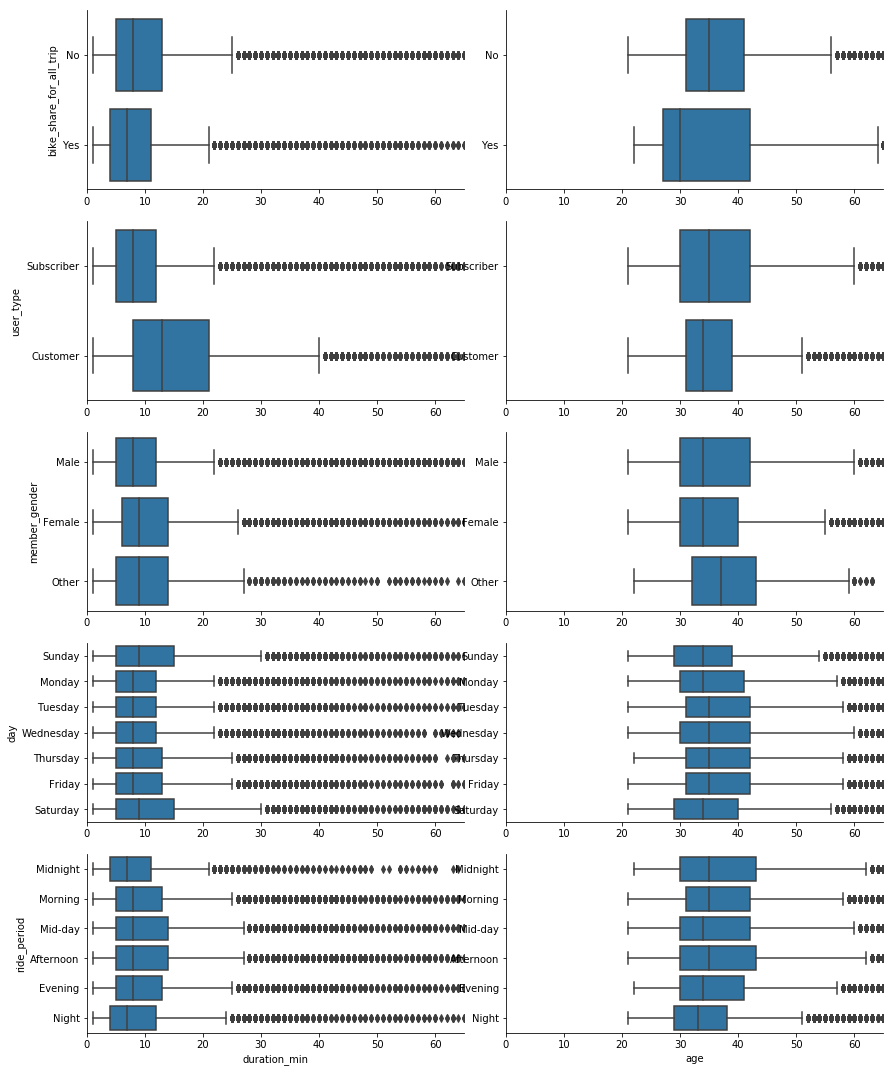

In [23]:
def boxgrid(x, y, **kwargs):
    sb.boxplot(x=x, y=y, color=color)
    plt.xlim([0, 65])
    
categoric_vars = ['bike_share_for_all_trip', 'user_type', 'member_gender', 'day', 'ride_period']
g = sb.PairGrid(data = trip, x_vars = ['duration_min', 'age'], y_vars = categoric_vars,
                size = 3, aspect = 2)

g.map(boxgrid);

I plotted a pairgrid boxplot of the numeric features againt the features of interest and discovered there were way too many outliers appearing in all of the charts. I then used the added a limit on the x-axis to zoom in on the box areas to view the descriptive statistics properly. 
Users who didn't share their trips travelled a slightly longer distance than those who shared and are slightly younger than users who shared their trips.
Non-subscribers tend to take trips of longer duration than subscribers while having ages that are slightly lesser.
Female and other genders take longer duration trips than the male gender but the female gender are of a slightly lesser age than the other two genders.
Users take trips of longer duration during weekends. Also, these users tend to be younger than those who take week-day trips.
Longer duration trips were taken during mid-day and afternoon while older people took trips more in the midnight and afternoon.

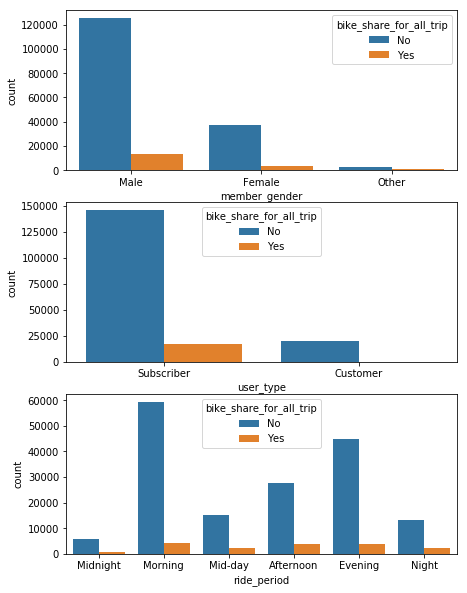

In [24]:
plt.figure(figsize = [7, 10])

plt.subplot(3, 1, 1)
sb.countplot(data = trip, x = 'member_gender',
             hue = 'bike_share_for_all_trip')

plt.subplot(3, 1, 2)
sb.countplot(data = trip, x = 'user_type',
             hue = 'bike_share_for_all_trip')

plt.subplot(3, 1, 3)
sb.countplot(data = trip, x = 'ride_period',
             hue = 'bike_share_for_all_trip');

Shared trips is highest among the male gender followed by the female gender and then other gender.
Non-subscribers of the bike service do not share trips and there were less shared trips in the midnight compared to other ride periods.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Shared trips were common among users who took trips of shorter duration and relatively older. Also, it is highly notable that the subscribed male users shared their trips than others.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There isn't so much correlation between users' Age and the duration of trips taken. Interestingly, from the heatmap of these features, most of the trips were taken by users under the age of 60 and were under 40 mins.

## Multivariate Exploration


Since I know that only subscribers of the bike service shared their trips, I'm going to create a subset of the original data which will include just the subscribers so I can get a deeper insight by comparing the age and trip duration of those who shared their trips and those who didn't.

In [25]:
#create a subset of the data
trip_sub = trip[trip['user_type'] == 'Subscriber']

In [ ]:
#define a function to format the charts
def plot_format(x, y, title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

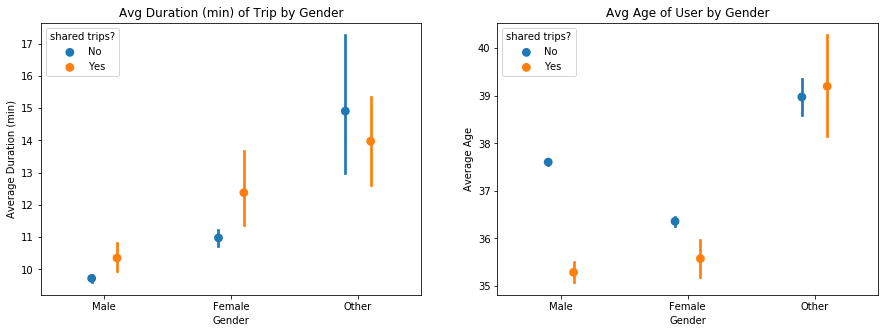

In [26]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sb.pointplot(data = trip_sub
, x = 'member_gender'
, y = 'duration_min'
,hue = 'bike_share_for_all_trip'
, linestyles = ''
, dodge = 0.2)
plot_format('Gender',
'Average Duration (min)',
'Avg Duration (min) of Trip by Gender')
plt.legend(title = 'shared trips?',
loc = 'upper left');

plt.subplot(1, 2, 2)
sb.pointplot(data = trip_sub,
x = 'member_gender',
y = 'age',
hue = 'bike_share_for_all_trip',
linestyles = '',
dodge = 0.2)
plot_format('Gender',
'Average Age',
'Avg Age of User by Gender')
plt.legend(title = 'shared trips?',
loc = 'upper left');

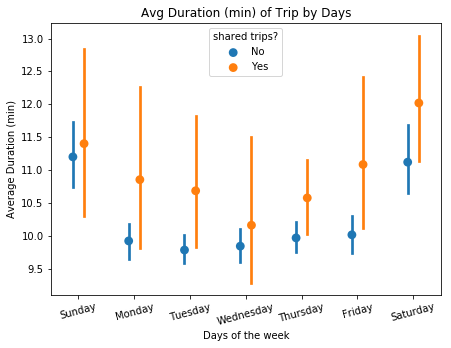

In [27]:
plt.figure(figsize = [7, 5])

sb.pointplot(data = trip_sub, x = 'day', y = 'duration_min',
            hue = 'bike_share_for_all_trip', linestyles = '', dodge = 0.2)
plot_format('Days of the week',
'Average Duration (min)',
'Avg Duration (min) of Trip by Days')
plt.xticks(rotation = 15)
plt.legend(title = 'shared trips?',
loc = 'upper center');

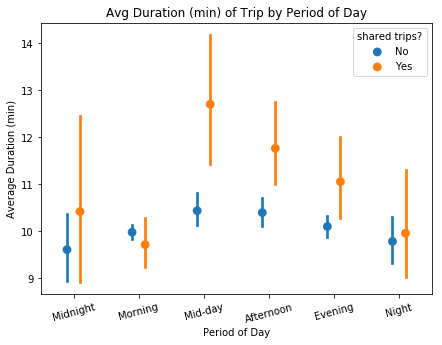

In [28]:
plt.figure(figsize = [7, 5])

sb.pointplot(data = trip_sub, x = 'ride_period', y = 'duration_min',
            hue = 'bike_share_for_all_trip', linestyles = '', dodge = 0.2)
plt.xticks(rotation = 15)
plt.xlabel('Period of Day')
plt.ylabel('Average Duration (min)')
plt.title('Avg Duration (min) of Trip by Period of Day')
plt.legend(title = 'shared trips?');


Now, I want to see the average age of users who shared their trips as well as the average duration of their trips. I also want to see how the duration of shared trips vary by gender on a daily and periodic basis. 

In [29]:
#create a subset of the data
trip_sub_yes = trip[(trip['user_type'] == 'Subscriber') & (trip['bike_share_for_all_trip'] == 'Yes')]

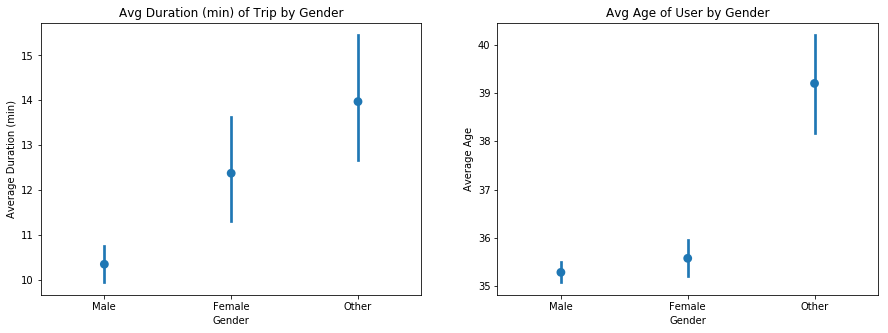

In [30]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sb.pointplot(data = trip_sub_yes, x = 'member_gender', y = 'duration_min',
            linestyles = '', dodge = 0.2)
plt.xlabel('Gender')
plt.ylabel('Average Duration (min)')
plt.title('Avg Duration (min) of Trip by Gender')

plt.subplot(1, 2, 2)
sb.pointplot(data = trip_sub_yes, x = 'member_gender', y = 'age',
            linestyles = '', dodge = 0.2)
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Avg Age of User by Gender');


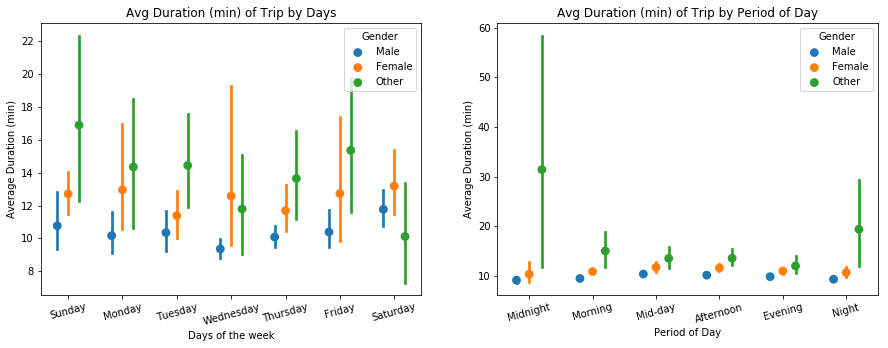

In [31]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sb.pointplot(data = trip_sub_yes, x = 'day', y = 'duration_min', hue = 'member_gender',
            linestyles = '', dodge = 0.4)
plt.xticks(rotation = 15)
plt.xlabel('Days of the week')
plt.ylabel('Average Duration (min)')
plt.title('Avg Duration (min) of Trip by Days')
plt.legend(title= 'Gender');

plt.subplot(1, 2, 2)
sb.pointplot(data = trip_sub, x = 'ride_period', y = 'duration_min', hue = 'member_gender',
            linestyles = '', dodge = 0.4)
plt.xticks(rotation = 15)
plt.xlabel('Period of Day')
plt.ylabel('Average Duration (min)')
plt.title('Avg Duration (min) of Trip by Period of Day')
plt.legend(title= 'Gender');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

On Average, Subscribers who shared their trips took rides of longer durations. Also, they have a relatively lesser average age than subscribers who didn't share their trips. This isn't the case for Other-gendered subscribers who shared their trips. Their trips were for relatively shorter durations and they were slightly older than those who didn't share trips.
On a daily basis, Shared trips had longer durations than unshared trips.
Shared trips had longer durations at every period of the day than unshared trips except for Mornigs.

### Were there any interesting or surprising interactions between features?

Other gender took trips of longer duration on everyday of the week other than Wednesday and Saturdays. The male gender's trip were of shorter duration across all days of the week when compared to the female and the other gender.
Interestingly, Other gender took shared trips whose duration was approximately triple and twice the duration of male and female gender in the Midnight and Night respectively.


## Conclusions
    1. 9% of all trips taken in the month of February were shared. 

    2. Most of the trips were taken on Thursdays.
    
    3. Male users were the highest users of the bike hailing service.
   
    4. The Peak periods of the trips taken were Morning and Evening.
    
    5. Shared trips were taken only by subscribers of the bike service. These subscribers are majorly of the male
    gender and the trips were mostly taken during the day.
    
    6. Average age of users who shared their trips is within the range of 35-40 years and their trips lasted for an average of 
    10-15 minutes
    
    7. Other-gendered subscribers took shared trips of longer duration in the night and midnight.